In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [2]:
ny_bus = pd.read_csv('bus-breakdown-and-delays.csv', low_memory = False)

In [3]:
ny_bus['Occurred_On'] = pd.to_datetime(ny_bus['Occurred_On'],utc='none')
ny_bus['Created_On'] = pd.to_datetime(ny_bus['Created_On'])

In [4]:
ny_bus['Occured_Year'] = ny_bus['Occurred_On'].dt.year

In [5]:
ny_bus['Boro'].unique()

array(['New Jersey', 'Manhattan', 'Bronx', 'Westchester', 'Brooklyn',
       'Rockland County', 'Nassau County', nan, 'Queens', 'Staten Island',
       'All Boroughs', 'Connecticut'], dtype=object)

In [6]:
np.sort(ny_bus['Number_Of_Students_On_The_Bus'].unique())

array([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
         11,   12,   13,   14,   15,   16,   17,   18,   19,   20,   21,
         22,   23,   24,   25,   26,   27,   28,   29,   30,   31,   32,
         33,   34,   35,   36,   37,   38,   39,   40,   41,   42,   43,
         44,   45,   46,   47,   48,   49,   50,   51,   52,   53,   54,
         55,   56,   57,   58,   59,   60,   61,   62,   63,   65,   66,
         67,   69,   73,   76,   81,   82,   91,  102,  105,  109,  129,
        132,  138,  141,  145,  147,  156,  157,  158,  172,  198,  207,
        209,  246,  250,  258,  280,  317,  331,  356,  404,  500,  518,
        520,  536,  584,  588,  610,  612,  620,  623,  629,  637,  649,
        728,  822,  843,  863,  871, 1005, 1011, 1015, 1050, 1060, 1148,
       1155, 1156, 1165, 1177, 1186, 1204, 1240, 1245, 1254, 1258, 1268,
       1304, 1307, 1315, 1324, 1329, 1330, 1331, 1346, 1347, 1352, 1366,
       1371, 1378, 1382, 1384, 1400, 1401, 1402, 14

In [7]:
def boro_unknown(cols):
    if str(cols) == 'nan':
        cols = 'Unknown'
    return cols

ny_bus['Boro'] = ny_bus['Boro'].apply(boro_unknown)

In [8]:
def change_to_int (cols):
    if cols>90:
        cols = 91
    else:
        cols = int(cols)
    return cols

ny_bus['Number_Of_Students_On_The_Bus'] = ny_bus['Number_Of_Students_On_The_Bus'].apply(change_to_int)

In [9]:
ny_bus

,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,...,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Incident_Number,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK,Occured_Year
0,2015-2016,1227538,Special Ed AM Run,2621,J711,Heavy Traffic,75003,2015-11-05 08:10:00+00:00,2015-11-05 08:12:00,New Jersey,...,11,Yes,No,Yes,2015-11-05T08:12:00.000,NaN,2015-11-05T08:12:14.000,Running Late,School-Age,2015
1,2015-2016,1227539,Special Ed AM Run,1260,M351,Heavy Traffic,06716,2015-11-05 08:10:00+00:00,2015-11-05 08:12:00,Manhattan,...,2,Yes,Yes,No,2015-11-05T08:12:00.000,NaN,2015-11-05T08:13:34.000,Running Late,School-Age,2015
2,2015-2016,1227540,Pre-K/EI,418,3,Heavy Traffic,C445,2015-11-05 08:09:00+00:00,2015-11-05 08:13:00,Bronx,...,8,Yes,Yes,Yes,2015-11-05T08:13:00.000,NaN,2015-11-05T08:13:22.000,Running Late,Pre-K,2015
3,2015-2016,1227541,Special Ed AM Run,4522,M271,Heavy Traffic,02699,2015-11-05 08:12:00+00:00,2015-11-05 08:14:00,Manhattan,...,6,No,No,No,2015-11-05T08:14:00.000,NaN,2015-11-05T08:14:04.000,Running Late,School-Age,2015
4,2015-2016,1227542,Special Ed AM Run,3124,M373,Heavy Traffic,02116,2015-11-05 08:13:00+00:00,2015-11-05 08:14:00,Manhattan,...,6,No,No,No,2015-11-05T08:14:00.000,NaN,2015-11-05T08:14:08.000,Running Late,School-Age,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379407,2018-2019,1565317,Pre-K/EI,2801,J47#5,Heavy Traffic,S047,2019-06-27 07:34:00+00:00,2019-06-27 07:37:00,Bronx,...,3,Yes,Yes,No,2019-06-27T07:37:00.000,NaN,1900-01-01T00:00:00.000,Running Late,Pre-K,2019
379408,2018-2019,1565318,Pre-K/EI,9349,5,Heavy Traffic,C465,2019-06-27 08:03:00+00:00,2019-06-27 08:26:00,Bronx,...,8,Yes,Yes,No,2019-06-27T08:26:00.000,NaN,1900-01-01T00:00:00.000,Running Late,Pre-K,2019
379409,2018-2019,1565319,Pre-K/EI,2616,NYM7,Heavy Traffic,E203,2019-06-27 11:40:00+00:00,2019-06-27 11:44:00,Bronx,...,5,Yes,Yes,No,2019-06-27T11:44:00.000,NaN,1900-01-01T00:00:00.000,Running Late,Pre-K,2019
379410,2018-2019,1565320,Special Ed AM Run,16412,K217,Other,"17333,17382,17448,17570,17669,17756",2019-06-27 13:18:00+00:00,2019-06-27 13:26:00,Brooklyn,...,0,Yes,Yes,No,2019-06-27T13:26:00.000,NaN,1900-01-01T00:00:00.000,Running Late,School-Age,2019


In [10]:
test = ny_bus[(ny_bus['Number_Of_Students_On_The_Bus'] <= 90) & (ny_bus['Boro'])]
test

,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,...,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Incident_Number,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK,Occured_Year
0,2015-2016,1227538,Special Ed AM Run,2621,J711,Heavy Traffic,75003,2015-11-05 08:10:00+00:00,2015-11-05 08:12:00,New Jersey,...,11,Yes,No,Yes,2015-11-05T08:12:00.000,NaN,2015-11-05T08:12:14.000,Running Late,School-Age,2015
1,2015-2016,1227539,Special Ed AM Run,1260,M351,Heavy Traffic,06716,2015-11-05 08:10:00+00:00,2015-11-05 08:12:00,Manhattan,...,2,Yes,Yes,No,2015-11-05T08:12:00.000,NaN,2015-11-05T08:13:34.000,Running Late,School-Age,2015
2,2015-2016,1227540,Pre-K/EI,418,3,Heavy Traffic,C445,2015-11-05 08:09:00+00:00,2015-11-05 08:13:00,Bronx,...,8,Yes,Yes,Yes,2015-11-05T08:13:00.000,NaN,2015-11-05T08:13:22.000,Running Late,Pre-K,2015
3,2015-2016,1227541,Special Ed AM Run,4522,M271,Heavy Traffic,02699,2015-11-05 08:12:00+00:00,2015-11-05 08:14:00,Manhattan,...,6,No,No,No,2015-11-05T08:14:00.000,NaN,2015-11-05T08:14:04.000,Running Late,School-Age,2015
4,2015-2016,1227542,Special Ed AM Run,3124,M373,Heavy Traffic,02116,2015-11-05 08:13:00+00:00,2015-11-05 08:14:00,Manhattan,...,6,No,No,No,2015-11-05T08:14:00.000,NaN,2015-11-05T08:14:08.000,Running Late,School-Age,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379407,2018-2019,1565317,Pre-K/EI,2801,J47#5,Heavy Traffic,S047,2019-06-27 07:34:00+00:00,2019-06-27 07:37:00,Bronx,...,3,Yes,Yes,No,2019-06-27T07:37:00.000,NaN,1900-01-01T00:00:00.000,Running Late,Pre-K,2019
379408,2018-2019,1565318,Pre-K/EI,9349,5,Heavy Traffic,C465,2019-06-27 08:03:00+00:00,2019-06-27 08:26:00,Bronx,...,8,Yes,Yes,No,2019-06-27T08:26:00.000,NaN,1900-01-01T00:00:00.000,Running Late,Pre-K,2019
379409,2018-2019,1565319,Pre-K/EI,2616,NYM7,Heavy Traffic,E203,2019-06-27 11:40:00+00:00,2019-06-27 11:44:00,Bronx,...,5,Yes,Yes,No,2019-06-27T11:44:00.000,NaN,1900-01-01T00:00:00.000,Running Late,Pre-K,2019
379410,2018-2019,1565320,Special Ed AM Run,16412,K217,Other,"17333,17382,17448,17570,17669,17756",2019-06-27 13:18:00+00:00,2019-06-27 13:26:00,Brooklyn,...,0,Yes,Yes,No,2019-06-27T13:26:00.000,NaN,1900-01-01T00:00:00.000,Running Late,School-Age,2019


In [11]:
ny_bus.groupby('Boro')['Number_Of_Students_On_The_Bus'].mean() ## ALL DATA

Boro
All Boroughs       2.052050
Bronx              3.423860
Brooklyn           2.470486
Connecticut        1.160338
Manhattan          1.023996
Nassau County      1.307367
New Jersey         2.118747
Queens             1.859906
Rockland County    1.430627
Staten Island      0.580308
Unknown            1.698062
Westchester        2.671520
Name: Number_Of_Students_On_The_Bus, dtype: float64

In [12]:
test.groupby('Boro')['Number_Of_Students_On_The_Bus'].mean() ##CLEAN NUMBER OF STUDENT ON THE BUS

Boro
All Boroughs       2.052050
Bronx              3.372674
Brooklyn           2.417899
Connecticut        1.160338
Manhattan          0.953388
Nassau County      1.253086
New Jersey         1.983806
Queens             1.806806
Rockland County    1.338477
Staten Island      0.557934
Unknown            1.617501
Westchester        2.535388
Name: Number_Of_Students_On_The_Bus, dtype: float64

In [13]:
affected_students_perYear = test.groupby('Occured_Year')['Number_Of_Students_On_The_Bus'].sum() ##CLEAN NUMBER OF STUDENT ON THE BUS 

Text(0.5, 1.0, 'Affected Students Based On Occured Year')

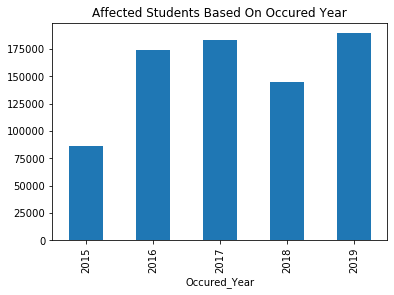

In [14]:
affected_students_perYear.plot(kind='bar')
plt.title('Affected Students Based On Occured Year')

In [15]:
affected_students_perYear

Occured_Year
2015     86676
2016    174311
2017    183640
2018    145095
2019    189521
Name: Number_Of_Students_On_The_Bus, dtype: int64

In [16]:
test['Number_Of_Students_On_The_Bus'].sum()

779243

In [17]:
affected_students_PerGrade = test.groupby('School_Age_or_PreK')['Number_Of_Students_On_The_Bus'].sum()

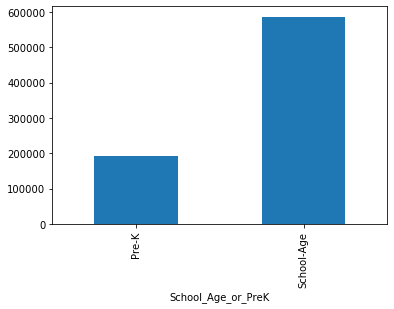

In [18]:
affected_students_PerGrade.plot(kind='bar')

In [19]:
affected_students_PerGrade

School_Age_or_PreK
Pre-K         192703
School-Age    586540
Name: Number_Of_Students_On_The_Bus, dtype: int64

### 0 number of student on the bus, yang berarti bus tersebut sudah breakdown/running late sebelum berhasil menjemput satupun murid-murid sekolah

In [20]:
az = ny_bus[(ny_bus['Number_Of_Students_On_The_Bus'] == 0)]
az

,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,...,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Incident_Number,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK,Occured_Year
17,2015-2016,1227560,Special Ed AM Run,1205,P662,Heavy Traffic,29059,2015-11-05 06:45:00+00:00,2015-11-05 08:26:00,Unknown,...,0,Yes,Yes,Yes,2015-11-05T08:26:00.000,NaN,2015-11-05T08:26:22.000,Running Late,School-Age,2015
20,2015-2016,1227565,Special Ed AM Run,631,P464,Heavy Traffic,28908,2015-11-05 08:20:00+00:00,2015-11-05 08:30:00,Queens,...,0,Yes,No,No,2015-11-05T08:30:00.000,NaN,2015-11-05T08:30:48.000,Running Late,School-Age,2015
22,2015-2016,1227077,General Ed AM Run,2675,X2189,Other,10095,2015-11-04 07:04:00+00:00,2015-11-04 07:11:00,Bronx,...,0,Yes,Yes,No,2015-11-04T07:11:00.000,NaN,2015-11-04T07:11:53.000,Breakdown,School-Age,2015
24,2015-2016,1227566,Special Ed AM Run,2413,M935,Heavy Traffic,03004,2015-11-05 08:30:00+00:00,2015-11-05 08:31:00,Manhattan,...,0,Yes,Yes,Yes,2015-11-05T08:31:00.000,NaN,2015-11-05T08:31:31.000,Running Late,School-Age,2015
25,2015-2016,1227567,General Ed AM Run,27704,M1227,Heavy Traffic,02267,2015-11-05 20:20:00+00:00,2015-11-05 08:33:00,Manhattan,...,0,Yes,No,No,2015-11-05T08:33:00.000,NaN,2015-11-05T08:35:03.000,Running Late,School-Age,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379400,2018-2019,1565310,Special Ed PM Run,1521,N701,Heavy Traffic,75907,2019-06-26 15:05:00+00:00,2019-06-26 15:12:00,Nassau County,...,0,Yes,Yes,Yes,2019-06-26T15:12:00.000,NaN,1900-01-01T00:00:00.000,Running Late,School-Age,2019
379402,2018-2019,1565312,Pre-K/EI,52204,B0946A,Mechanical Problem,E052A,2019-06-27 07:15:00+00:00,2019-06-27 07:29:00,Brooklyn,...,0,Yes,Yes,Yes,2019-06-27T07:29:00.000,NaN,1900-01-01T00:00:00.000,Running Late,Pre-K,2019
379403,2018-2019,1565313,Pre-K/EI,4002,B0961A,Other,E052A,2019-06-27 07:15:00+00:00,2019-06-27 07:31:00,Brooklyn,...,0,Yes,Yes,Yes,2019-06-27T07:31:00.000,NaN,1900-01-01T00:00:00.000,Running Late,Pre-K,2019
379410,2018-2019,1565320,Special Ed AM Run,16412,K217,Other,"17333,17382,17448,17570,17669,17756",2019-06-27 13:18:00+00:00,2019-06-27 13:26:00,Brooklyn,...,0,Yes,Yes,No,2019-06-27T13:26:00.000,NaN,1900-01-01T00:00:00.000,Running Late,School-Age,2019


### BUS COMPANY YANG SERING TIDAK BERHASIL MENJEMPUT SATU PUN MURID SEKOLAH (COUNT BY PER OCCURENCE)

In [45]:
an = az['Bus_Company_Name'].value_counts().head(30)
an

LEESEL TRANSPORTATION CORP (B2192)     38282
BORO TRANSIT, INC.                     14477
PIONEER TRANSPORTATION CORP            13914
LITTLE RICHIE BUS SERVICE              11541
RELIANT TRANSPORTATION, INC (B2321)    10102
LEESEL TRANSP CORP (B2192)              9539
PIONEER TRANSPORTATION CO               8900
SNT BUS INC                             8639
LOGAN BUS COMPANY INC.                  7241
RELIANT TRANS, INC. (B232               7062
NEW DAWN TRANSIT, LLC (B2321)           5833
LEESEL TRANSP CORP (B2192               5343
VAN TRANS LLC (B2192)                   5152
NEW DAWN TRANSIT, LLC (B2               4716
HOYT TRANSPORTATION CORP.               4419
L & M BUS CORP.                         4253
JOFAZ TRANSPORTATION INC.               4246
G.V.C., LTD.                            3870
RELIANT TRANS, INC. (B2321)             3638
LITTLE LISA BUS CO. INC.                3493
G.V.C. LTD. (B2192)                     3229
GRANDPA`S BUS CO., INC.                 3154
LORINDA EN

Text(0.5, 1.0, '0 Number of Student on The Bus per-Occurence')

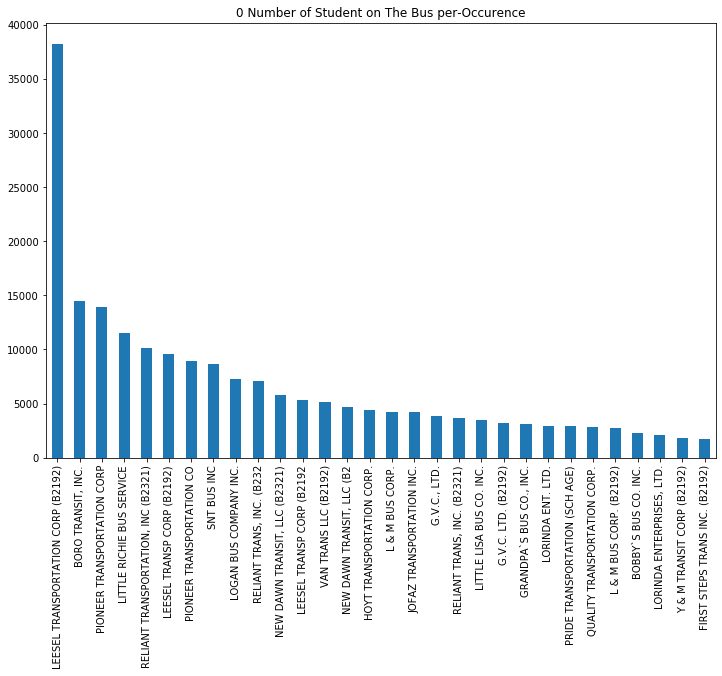

In [46]:
plt.figure(figsize=(12,8))
an.plot(kind = 'bar')
plt.title('0 Number of Student on The Bus per-Occurence')

In [44]:
ny_bus['Number_Of_Students_On_The_Bus'].value_counts()

0     233779
2      21658
1      21388
3      20293
4      16810
       ...  
67         1
59         1
58         1
82         1
56         1
Name: Number_Of_Students_On_The_Bus, Length: 73, dtype: int64